# Playing with the HOG 

[tutorial](https://www.thepythoncode.com/article/hog-feature-extraction-in-python)

In [6]:
#importing required libraries
from skimage.io import imead
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# reading the image
img = cv2.imread('/Users/adrienloizeau/cs/vic-assignment2/test/001.jpg')
plt.axis("off")
plt.imshow(img)
print(img.shape)

ImportError: cannot import name 'imead' from 'skimage.io' (/Users/adrienloizeau/opt/anaconda3/envs/cs/lib/python3.11/site-packages/skimage/io/__init__.py)

(512, 256, 3)


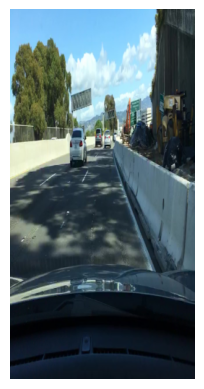

In [3]:
# resizing image
resized_img = resize(img, (128*4, 64*4))
plt.axis("off")
plt.imshow(resized_img)
print(resized_img.shape)

/var/folders/2b/0qd69c615vl_r5y2zqwsf9mc0000gn/T/ipykernel_93772/2333105184.py:2: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),


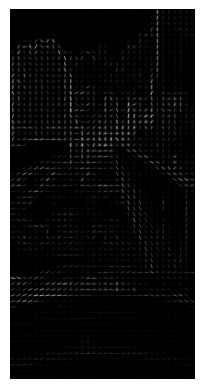

In [4]:
#creating hog features
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

# Pyimages

[Pyimages tutorial for classification](https://customers.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/)
    - KNN

# Gihub
[Vehicule detection](https://github.com/sourav90in/Vehicle-Detection)

In [36]:
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from skimage.transform import rotate, warp, ProjectiveTransform
from skimage.color import rgb2gray
from skimage.feature import hog

#### Exploring the different channels and their impacts

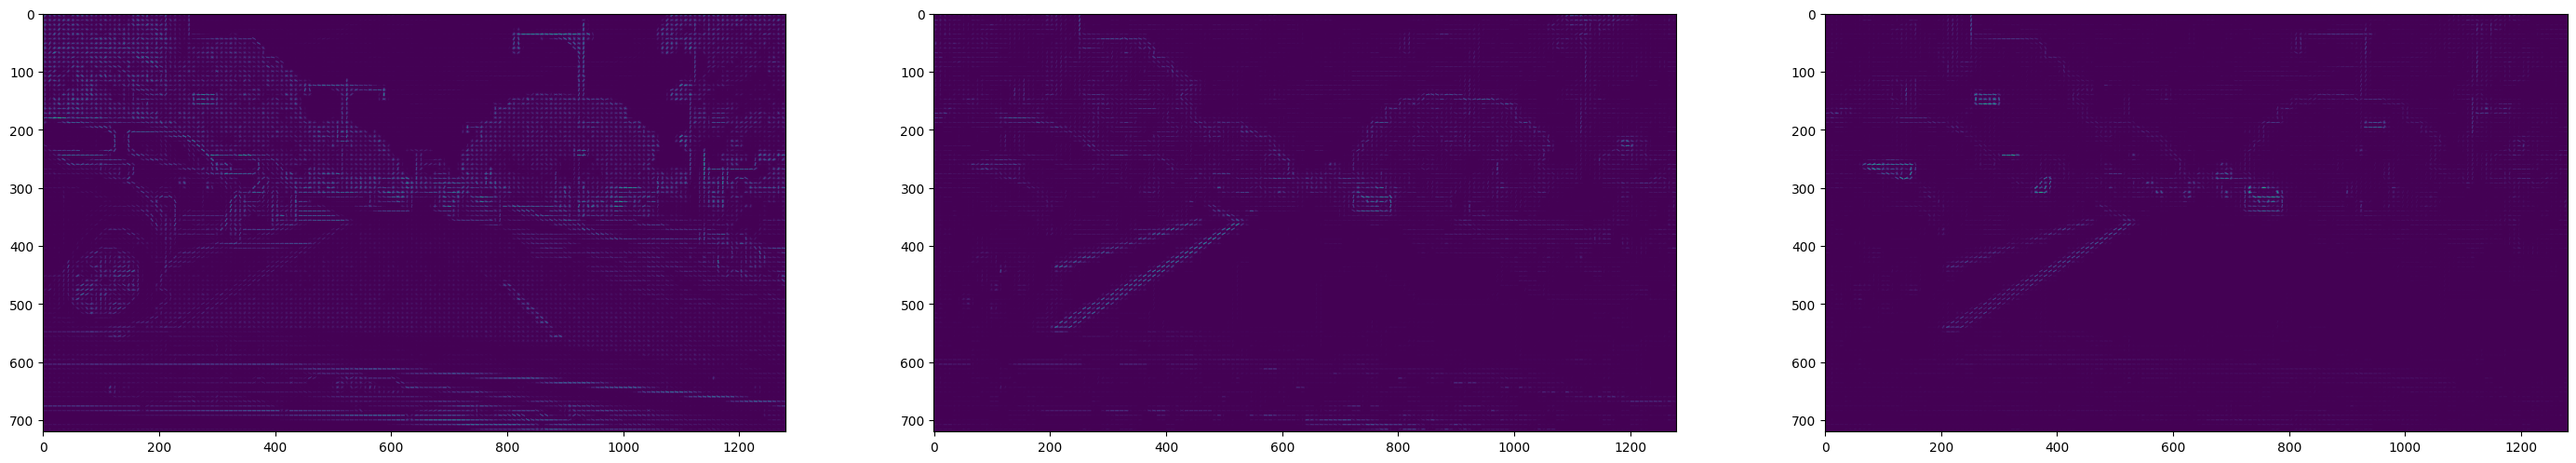

In [41]:
orientations=9
pixels_per_cell=(8, 8)
cells_per_block=(2, 2)

# Load the image and convert to grayscale
img = cv2.imread("train/A_001.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
img1 = img[:,:,0]
img2 = img[:,:,1]
img3 = img[:,:,2]

# Extract HOG features from the atransformed images
fd, hog_image1 = hog(img1, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True)
fd, hog_image2 = hog(img2, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True)
fd, hog_image3 = hog(img3, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True)

fig, ax = plt.subplots(1,3, figsize = (35,50))
ax[0].imshow(hog_image1)
ax[1].imshow(hog_image2)
ax[2].imshow(hog_image3)
plt.show()


Conclusion: we must explore each color and have a model per color

#### Explore normalization

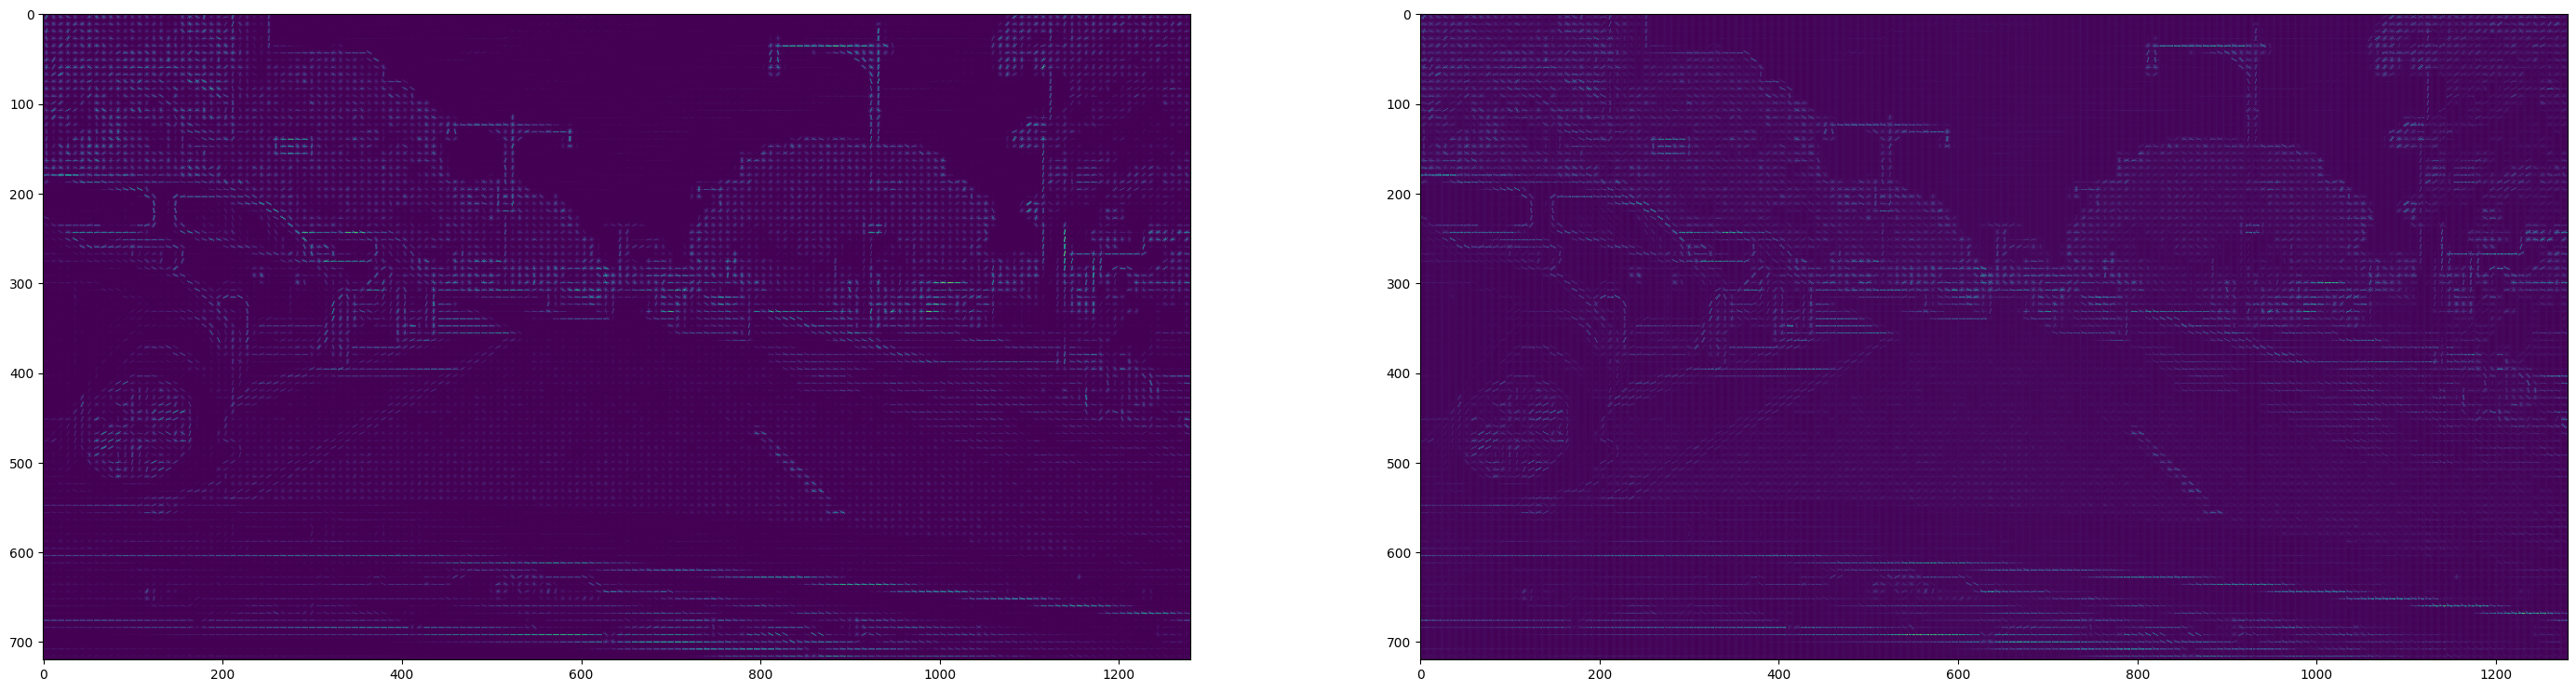

In [43]:
orientations=9
pixels_per_cell=(8, 8)
cells_per_block=(2, 2)

# Load the image and convert to grayscale
img = cv2.imread("train/A_001.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
img1 = img[:,:,0]

# Extract HOG features from the atransformed images
fd, hog_image = hog(img1, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True)
fd1, hog_image1 = hog(img1, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True)

scaler = StandardScaler()
hog_image1 = scaler.fit_transform(hog_image1)

fig, ax = plt.subplots(1,2, figsize = (35,50))
ax[0].imshow(hog_image)
ax[1].imshow(hog_image1)
plt.show()


Conclusion: Normalization has an important effect. We must take it into account during our training

#### Exploring block normalization

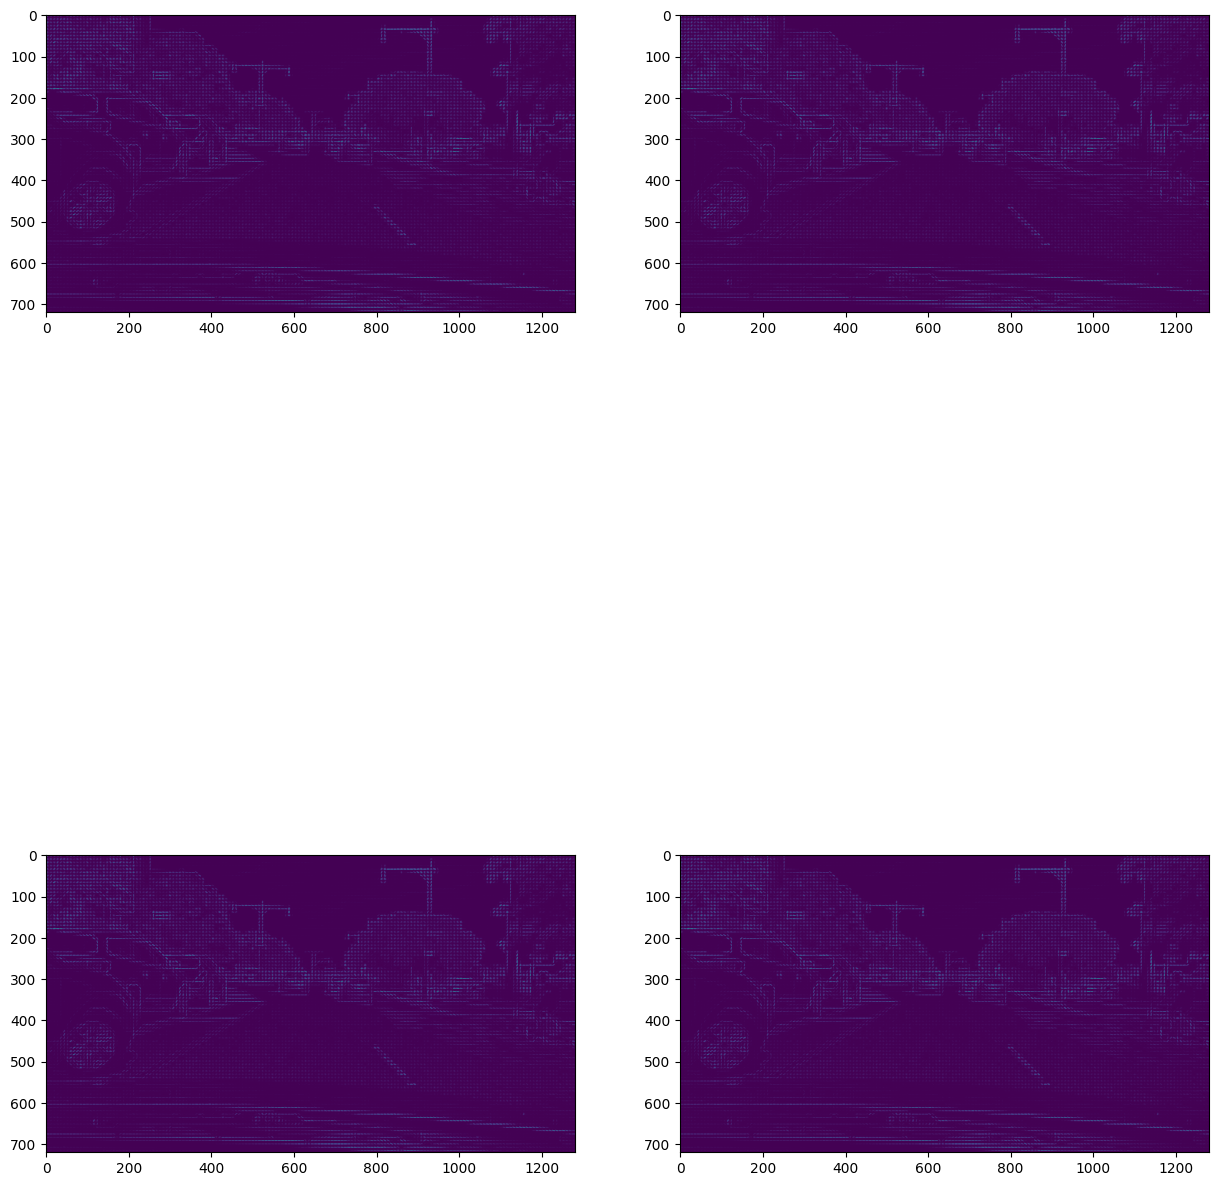

In [49]:
orientations=9
pixels_per_cell=(8, 8)
cells_per_block=(2, 2)

# Load the image and convert to grayscale
img = cv2.imread("train/A_001.jpg")
img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
img1 = img[:,:,0]

# Extract HOG features from the atransformed images
fd, hog_image = hog(img1, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True)
fd, hog_image1 = hog(img1, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True,block_norm = "L1")
fd, hog_image3 = hog(img1, orientations=orientations, pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, visualize=True,block_norm = "L2")

scaler = StandardScaler()
hog_image4 = scaler.fit_transform(hog_image)

fig, ax = plt.subplots(2,2, figsize = (15,20))
ax[0][0].imshow(hog_image)
ax[0][1].imshow(hog_image)
ax[1][0].imshow(hog_image1)
ax[1][1].imshow(hog_image3)
plt.show()


Can't really make a conclusion here